# Исследование данных о продажах игр


Нам доступны данные интернет-магазина, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Нам необходимо исследовать закономерности, определяющие успешность игры. Цель исследования - найти потенциально популярные продукт, для последующего планирования рекламных кампаний. Таблица данных содержит информацию до 2016 года.

Данное исследование разделим на несколько шагов.<br>
### <a href='#section0'>0. Импорт файлов и библиотек</a><br>
### <a href='#section1'>1. Получение общей информации</a><br>
### <a href='#section2'>2. Предобработка данных</a><br>
#### <a href='#section21'>2.1. Замена названий столбцов</a><br>
#### <a href='#section22'>2.2. Обработка аббревиатуры 'tbd'</a><br>
#### <a href='#section23'>2.3. Заполнение пропусков и исправление ошибок</a><br>
#### <a href='#section24'>2.4. Изменение типов данных</a><br>
#### <a href='#section25'>2.5. Подсчет суммарных продаж во всех регионах</a><br>
### <a href='#section3'>3. Исследовательский анализ данных </a><br>
#### <a href='#section31'>3.1. Подсчет количества игр, выпущенных в разные годы. </a><br>
#### <a href='#section32'>3.2. Анализ выпуска игр по платформам</a><br>
#### <a href='#section33'>3.3. Выбор платформ с наибольшими суммарными продажами. Распределение по годам. Определение срока пребывания платформ на рынке</a><br>
#### <a href='#section34'>3.4. Определение актуального периода для прогноза на 2017 год</a><br>
#### <a href='#section35'>3.5. Выбор нескольких потенциально прибыльных платформ</a><br>
#### <a href='#section36'>3.6. Анализ глобальных продаж игр в разбивке по платформам</a><br>
#### <a href='#section37'>3.7. Влияние отзывов пользователей на продажи внутри платформы</a><br>
#### <a href='#section38'>3.8. Влияние отзывов критиков на продажи внутри платформы</a><br>
#### <a href='#section39'>3.9. Определение самых прибыльных и убыточных жанров.</a><br>
### <a href='#section4'>4. Составление портрета пользователя каждого региона (NA, EU, JP)</a><br>
#### <a href='#section41'>4.1. Определение топ-5 популярных платформ</a><br>
#### <a href='#section42'>4.2. Определение топ-5 популярных жанров</a><br>
#### <a href='#section43'>4.3. Влияние рейтинга ESRB на продажи в отдельном регионе</a><br>
### <a href='#section5'>5. Проверка гипотез</a><br>
#### <a href='#section51'>5.1. Нулевая гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC равны</a><br>
#### <a href='#section52'>5.2. Нулевая гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports равны</a><br>
### <a href='#section6'>Общий вывод</a>

### <a id='section0'>0. Импорт файлов и библиотек</a><br>

In [1]:
#Импортируем все необходимые библиотеки и файл с данными о продажах игр
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
data = pd.read_csv('/datasets/games.csv')

### <a id='section1'>1. Получение общей информации</a><br>

In [2]:
#Выводим общую информацию о датасете и основные статистические данные
display(data.info(), data.describe(), data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

In [4]:
#Выводим часто встречающиеся значения столбцов, чтобы получить общее представление
display(
        data['Name'].value_counts()[:25], 
        data['Platform'].value_counts()[:10], 
        data['Genre'].value_counts()[:10], 
        data['Rating'].value_counts()[:5], 
        data['Year_of_Release'].unique(), 
        data['Critic_Score'].unique(), 
        data['User_Score'].unique()
       )

Need for Speed: Most Wanted                  12
LEGO Marvel Super Heroes                      9
FIFA 14                                       9
Ratatouille                                   9
Madden NFL 07                                 9
Monopoly                                      8
LEGO Harry Potter: Years 5-7                  8
LEGO The Hobbit                               8
FIFA Soccer 13                                8
FIFA 15                                       8
The LEGO Movie Videogame                      8
Cars                                          8
LEGO Star Wars II: The Original Trilogy       8
LEGO Jurassic World                           8
Angry Birds Star Wars                         8
Madden NFL 08                                 8
Lego Batman 3: Beyond Gotham                  8
Terraria                                      8
FIFA Soccer 11                                7
Star Wars The Clone Wars: Republic Heroes     7
Harry Potter and the Sorcerer's Stone   

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
Name: Platform, dtype: int64

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Name: Genre, dtype: int64

E       3990
T       2961
M       1563
E10+    1420
EC         8
Name: Rating, dtype: int64

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

### Вывод

В таблице с данными 16715 наблюдений. В некоторых столбцах присутствуют пропуски. Наблюдения с пропусками в столбцах 'Name', 'Genre' можно исключить, а пропуски в 'Year of Release' игры заменить на средний год выпуска платформы. Пропуски в столбцах 'Critic_Score', 'User_Score'  можно заменить на среднее значение похожих игр. Пропуски в 'Rating' можно заменить созданием словаря, который будет записывать самое популярное значение в группе (например, игры одного названия). Ошибка в вычислении 'Critic_Score', 'User_Score' не испортит общую картину, в то время как неточность 'Rating' может исказить понимание. 'Rating' содержит категориальные значения и возможных значений немного, поэтому пропуски желательно заменить на '' для сохранения точности. В среднем, больше всего объем продаж игры в регионе Северная Америка, затем идет Европа, потом Япония, и меньше всего в других странах. За все периоды суммарно: наиболее популярные серии игр - симуляции гонок Need For Speed, футбола fifa и детские игры Lego; наиболее популярные приставки Playstation и Nintendo; жанры - Action и Sports, Рейтинги - Для всех (E) и для подростков (T). 

### <a id='section2'>2. Предобработка данных</a><br>
#### <a id='section21'>2.1. Замена названий столбцов</a><br>

In [5]:
data.columns = data.columns.str.lower()
display(data.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Названия столбцов приведены к нижнему регистру

#### <a id='section22'>2.2. Обработка аббревиатуры 'tbd'</a><br>

In [6]:
display(data[data['user_score'] == 'tbd'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


2424 значений имеют рейтинг tbd. Поскольку эта аббревеатура может иметь несколько значений, будем придерживаться наиболее подходящего по смыслу 'to be determined'. Это означает, что пользовательская оценка еще не определена. Поскольку встречаются в т.ч. давно прошедшие годы выпуска игр, это означает что пользовательских оценок недостаточно и среднее значение на их основе будет некорректным. В таком случае 'tbd' == nan и эти значения будут обработаны как пропуски.

In [7]:
#Заменяем тип данных в столбце 'user_score' на float, переводя 'tbd' в nan соответстующим параметром обработки ошибок
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

#### <a id='section23'>2.3. Заполнение пропусков и исправление ошибок</a><br>

In [8]:
#Проверяем, есть ли дубликаты
display(data.duplicated().unique())

array([False])

In [9]:
#Поскольку у некоторых игр очень много пропусков, удаляем наблюдения, имеющие больше 3-х na значений
data.dropna(how='any', thresh=8, inplace=True)

In [10]:
display(data['year_of_release'].value_counts())

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

In [11]:
#Заполняем пропуски в 'year_of_release' средним значением через функцию, группируя игры по платформам (поколения платформ менялись с годами, поэтому если игра была выпущена под определенную платформу, велика вероятность что временной разрыв между этой игрой и другими играми для этой платформы небольшой)
yor_dict = data.groupby('platform')['year_of_release'].mean().to_dict()
def yor(row):
    if pd.isna(row['year_of_release']):
        return yor_dict.get(row['platform'])
    return row['year_of_release']
data['year_of_release'] = data.apply(yor, axis=1)
#Округляем дробные средние значения и округляем год релиза в меньшую сторону(для избежания возможной ошибки появления 2017 года в датасете).
data['year_of_release'] = np.floor(data['year_of_release']).astype('Int64')
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16628 entries, 0 to 16714
Data columns (total 11 columns):
name               16628 non-null object
platform           16628 non-null object
year_of_release    16628 non-null Int64
genre              16628 non-null object
na_sales           16628 non-null float64
eu_sales           16628 non-null float64
jp_sales           16628 non-null float64
other_sales        16628 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


None

In [12]:
#Заполняем пропуски в столбце 'rating' по похожему имени игр. Для этого пишем функцию
rating_dict = data.set_index("name")['rating'].to_dict()
def rt(row):
    if pd.isna(row['rating']):
        return rating_dict.get(row['name'])
    return row['rating'] 
data['rating'] = data.apply(rt, axis=1)
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16628 entries, 0 to 16714
Data columns (total 11 columns):
name               16628 non-null object
platform           16628 non-null object
year_of_release    16628 non-null Int64
genre              16628 non-null object
na_sales           16628 non-null float64
eu_sales           16628 non-null float64
jp_sales           16628 non-null float64
other_sales        16628 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             10149 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


None

In [13]:
#Изучаем природу пропусков в 'user_score' и 'critic_score'. Считаем количество заполненных 'user_score' и 'critic_score' по годам
user_score_by_year = data[~data['user_score'].isna()].groupby('year_of_release').agg('count')['name'].reset_index()
critic_score_by_year = data[~data['critic_score'].isna()].groupby('year_of_release').agg('count')['name'].reset_index()
user_score_and_critic_score = user_score_by_year.merge(critic_score_by_year, on='year_of_release', how='outer')
user_score_and_critic_score.columns = ['year_of_release', 'user_score', 'critic_score']
#Считаем количество незаполненных 'user_score' и 'critic_score' по годам
user_score_nas_by_year = data[data['user_score'].isna()].groupby('year_of_release').agg('count')['name'].reset_index()
critic_score_nas_by_year = data[data['critic_score'].isna()].groupby('year_of_release').agg('count')['name'].reset_index()
user_score_and_critic_score_nas = user_score_nas_by_year.merge(critic_score_nas_by_year, on='year_of_release', how='outer')
user_score_and_critic_score_nas.columns = ['year_of_release', 'user_score_nas', 'critic_score_nas']
#Объединяем полученные таблицы
us_cs_final = user_score_and_critic_score.merge(user_score_and_critic_score_nas, on='year_of_release', how='outer').sort_values(by='year_of_release', ascending=True)
display(us_cs_final)

,year_of_release,user_score,critic_score,user_score_nas,critic_score_nas
25,1980,NaN,NaN,9,9
26,1981,NaN,NaN,46,46
27,1982,NaN,NaN,36,36
28,1983,NaN,NaN,17,17
29,1984,NaN,NaN,14,14
0,1985,1.0,1.0,13,13
30,1986,NaN,NaN,21,21
31,1987,NaN,NaN,16,16
1,1988,1.0,1.0,14,14
32,1989,NaN,NaN,17,17


В период с 1980 по 1995 гг. практически все игры не имеют оценок пользователей и критиков. Но просто исключить 
этот период не получится, поскольку в дальнейшем пропуски нормально распределены и их слишком много, чтобы корректно заполнить каким-то средним или медианным значением. Заменим их на 0, но в дальнейшем исключим для проверки статистических гипотез и построения графиков.

In [14]:
#Пропуски в 'user_score' и 'critic_score' заменяем на 0
data['user_score'].fillna(value=0, inplace=True)
data['critic_score'].fillna(value=0, inplace=True)

In [15]:
#Оставшиеся пропуски 'rating' заменяем на 'Unknown'
data['rating'].fillna(value='Unknown', inplace=True)
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16628 entries, 0 to 16714
Data columns (total 11 columns):
name               16628 non-null object
platform           16628 non-null object
year_of_release    16628 non-null Int64
genre              16628 non-null object
na_sales           16628 non-null float64
eu_sales           16628 non-null float64
jp_sales           16628 non-null float64
other_sales        16628 non-null float64
critic_score       16628 non-null float64
user_score         16628 non-null float64
rating             16628 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


None

Значения столбца 'year_of_release' переведены в Int64. Наблюдения в таблице проверены на наличие дубликатов. Наблюдения с более чем 3 пропусками удалены. Пропуски в годах выпуска игры заменены на средние значения годов выпуска игр на одной платформе. Пропуски в 'critic_score' и 'user_score' заменены на 0. Значения рейтинга были взяты у игр с похожим именем либо заменены на 'Unknown' значение.

#### <a id='section24'>2.4. Изменение типов данных</a><br>

In [16]:
#Заменяем тип данных в столбцах 'year_of_release' на Int64, поскольку все существующие значения уже целочисленные
data['year_of_release'] = data['year_of_release'].astype('Int64')
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16628 entries, 0 to 16714
Data columns (total 11 columns):
name               16628 non-null object
platform           16628 non-null object
year_of_release    16628 non-null Int64
genre              16628 non-null object
na_sales           16628 non-null float64
eu_sales           16628 non-null float64
jp_sales           16628 non-null float64
other_sales        16628 non-null float64
critic_score       16628 non-null float64
user_score         16628 non-null float64
rating             16628 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


None

Значения столбца 'critic_score' переведены в Int64. Значения столбца 'user_score' приведено к float64, с условием что аббревеатура 'tbd' равна nan.

#### <a id='section25'>2.5. Подсчет суммарных продаж во всех регионах</a><br>

In [17]:
#Создаем новый столбец путем сложения значений четырех регионов для каждого наблюдения
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
display(data['total_sales'].head(10))

0    82.54
1    40.24
2    35.52
3    32.77
4    31.38
5    30.26
6    29.80
7    28.91
8    28.32
9    28.31
Name: total_sales, dtype: float64

### Вывод

Названия столбцов приведены к нижнему регистру. Аббревеатура 'tbd' обработана как nan. Значения столбца 'year_of_release' переведены в Int64. Значения столбца 'user_score' приведено к float64. Наблюдения в таблице проверены на наличие полных дубликатов. Наблюдения с более чем 3 пропусками удалены. Пропуски в годах выпуска игры заменены на средние значения годов выпуска игр на одной платформе. Пропуски в 'critic_score' и 'user_score' заменены на 0. Значения рейтинга были взяты у игр с похожим именем либо заменены на значение: 'Unknown'. Создан новый столбец 'total', в котором представлены суммарные продажи каждой игры во всех регионах.

### <a id='section3'>3. Исследовательский анализ данных </a><br>
#### <a id='section31'>3.1. Подсчет количества игр, выпущенных в разные годы. </a><br>

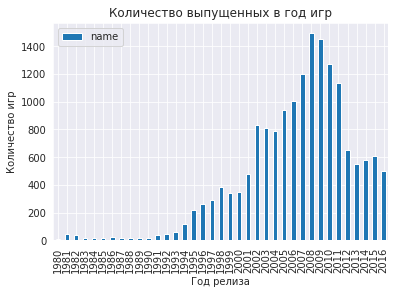

In [18]:
games_by_year = data.pivot_table(index = 'year_of_release', values='name', aggfunc='count')
games_by_year.plot.bar()
plt.title('Количество выпущенных в год игр')
plt.xlabel('Год релиза')
plt.ylabel('Количество игр')
plt.show()

Больше всего игр было выпущено в период 2008-2009 гг. Последующее падение продаж можно объяснить развитием рынка игр для мобильных устройств. Многие игроки предпочли бюджетные, переносные мобильные устройства старым платформам. Наиболее актуальный период для прогнозирования продаж на 2017 год - это данные с 2012 года.

#### <a id='section32'>3.2. Анализ выпуска игр по платформам</a><br>

In [19]:
#Определим для каких платформ было выпущено больше всего игр
games_by_platform = data.pivot_table(index = 'platform', values='name', aggfunc='count').reset_index().sort_values(by='name', ascending=False)
display(games_by_platform.head(10))

,platform,name
16,PS2,2152
4,DS,2139
17,PS3,1324
26,Wii,1311
28,X360,1256
19,PSP,1201
15,PS,1194
13,PC,974
29,XB,822
6,GBA,819


Платформы, для которых было выпущено более 900 игр - это PS2, DS, PS3, Wii, X360, PSP, PS, PC. 

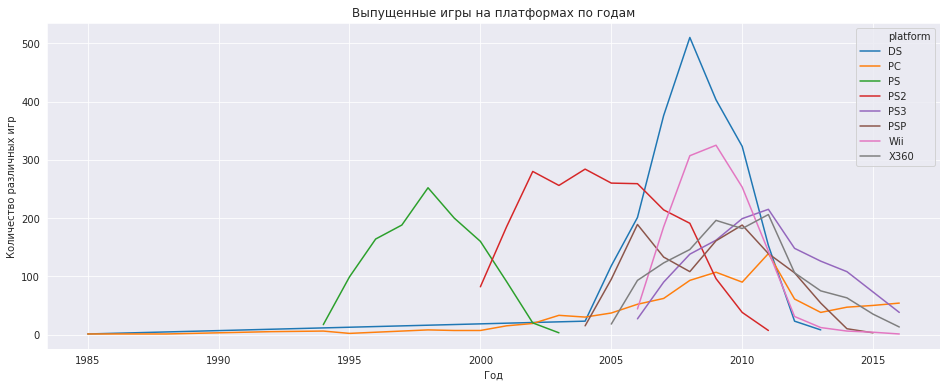

In [20]:
#Построим для популярных платформ распределение выпущенных игр по годам
list_of_platforms1 = ['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC']
games_by_platform_and_years = data.query('platform in @list_of_platforms1').pivot_table(index = ['platform', 'year_of_release'], values='name', aggfunc='count').reset_index() 
plt.figure(figsize=(16, 6))
sns.set_style('darkgrid')
ax = sns.lineplot(data=games_by_platform_and_years, x='year_of_release', y='name', hue='platform')
ax.set_title('Выпущенные игры на платформах по годам')
ax.set_xlabel('Год')
ax.set_ylabel('Количество различных игр')
plt.show()

В среднем для самых популярных платформ основное количество игр выпускается в течение 5-9 лет.

#### <a id='section33'>3.3. Выбор платформ с наибольшими суммарными продажами. Распределение по годам. Определение срока пребывания платформ на рынке</a><br>

In [21]:
#Определим, для каких платформ было больше всего продаж
sales_by_platform = data.pivot_table(index = 'platform', values='total_sales', aggfunc='sum').reset_index().sort_values(by='total_sales', ascending=False)
display(sales_by_platform.head(10))


,platform,total_sales
16,PS2,1251.44
28,X360,971.15
17,PS3,939.21
26,Wii,905.90
4,DS,805.58
15,PS,729.27
6,GBA,316.46
18,PS4,314.14
19,PSP,292.53
13,PC,259.52


Платформы, для которых было продано боле 250 млн копий - PS2, X360, PS3, Wii, DS, PS, GBA, PS4, PSP, PC

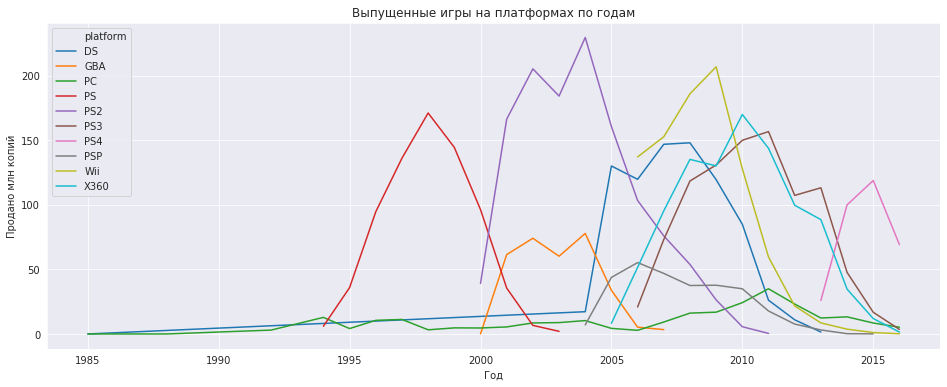

In [22]:
list_of_platforms2 = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']
sales_by_platform_and_years = data.query('platform in @list_of_platforms2').pivot_table(index = ['platform', 'year_of_release'], values='total_sales', aggfunc='sum').reset_index() 
plt.figure(figsize=(16, 6))
ax = sns.lineplot(data=sales_by_platform_and_years, x='year_of_release', y='total_sales', hue='platform')
ax.set_title('Выпущенные игры на платформах по годам')
ax.set_xlabel('Год')
ax.set_ylabel('Продано млн копий')
plt.show()

В среднем для самых популярных платформ максимальные продажи игр происходят в течение 5-9 лет.

#### <a id='section34'>3.4. Определение актуального периода для прогноза на 2017 год</a><br>

Основываясь на выводах из пунков 3.1, 3.2, 3.3 определим актуальные период как 2012-2016 гг. Будем считать, что в этот период окончательно снижается поддержка устаревших платформ(PS3, X360) и устанавливаются на рынке новые платформы-лидеры(XOne, PS4). Отфильтруем существующий датасет.

In [23]:
relevant_data = data[data['year_of_release'] > 2011]
print('Всего актуальных наблюдений:', len(relevant_data))

Всего актуальных наблюдений: 2892


#### <a id='section35'>3.5. Выбор нескольких потенциально прибыльных платформ</a><br>

In [24]:
#Находим платформы с максимальными продажами за релевантный период
relevant_sales_by_platform = relevant_data.pivot_table(index = 'platform', values='total_sales', aggfunc='sum').reset_index().sort_values(by='total_sales', ascending=False)
display(relevant_sales_by_platform.head(20))

,platform,total_sales
4,PS4,314.14
3,PS3,288.79
9,X360,236.54
0,3DS,195.45
10,XOne,159.32
8,WiiU,82.19
2,PC,62.65
6,PSV,49.44
7,Wii,35.37
1,DS,12.55


Наиболее большие продажи у PS4, PS3, X360, 3DS, XOne. Определим, какие из всех платформ растут в продажах, а какие падают.

Платформа PS4


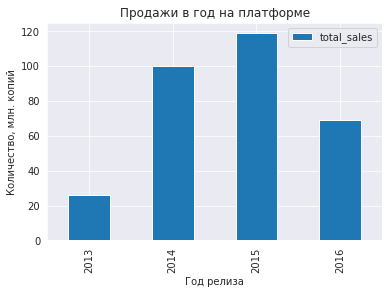

Платформа PS3


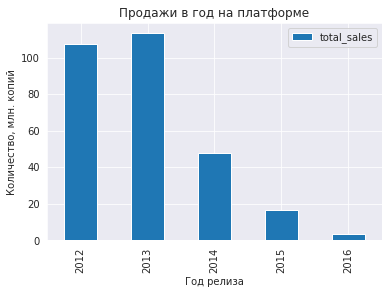

Платформа X360


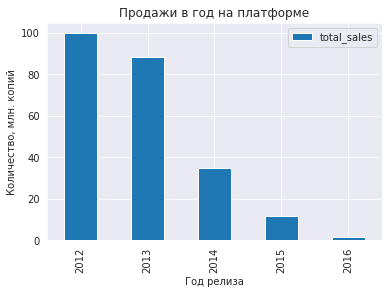

Платформа 3DS


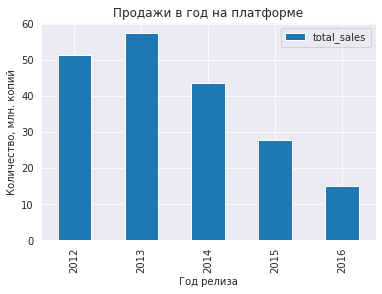

Платформа XOne


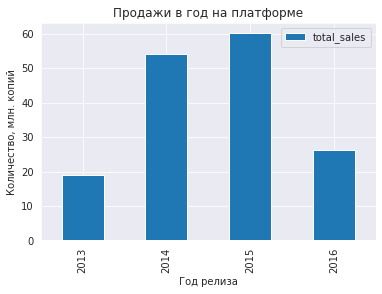

Платформа WiiU


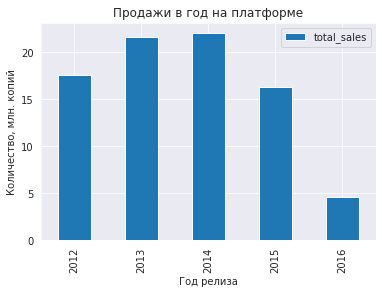

Платформа PC


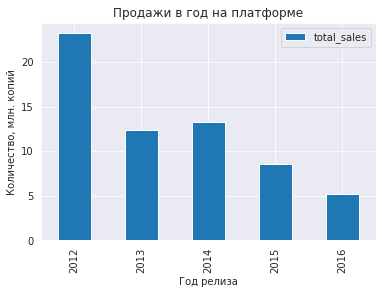

Платформа PSV


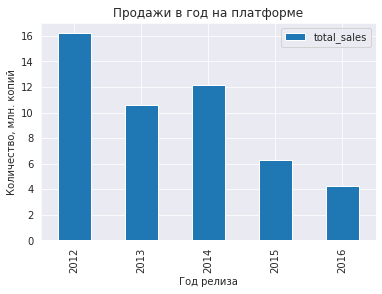

Платформа Wii


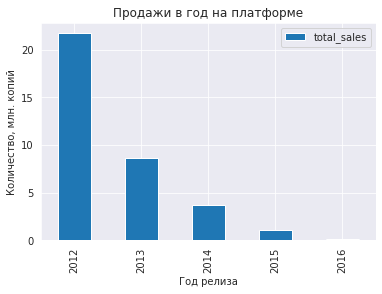

Платформа DS


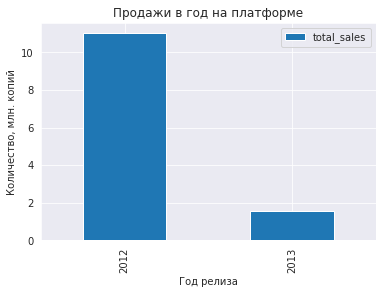

Платформа PSP


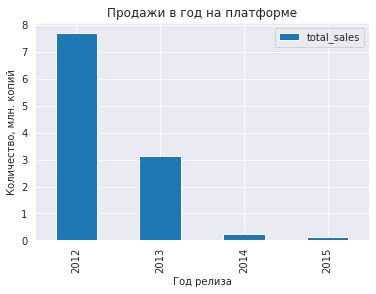

In [25]:
list_of_platforms3 = ['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii', 'DS', 'PSP' ]
for i in list_of_platforms3:
    print('Платформа', i)
    relevant_data[relevant_data['platform'] == i].pivot_table(index = 'year_of_release', values='total_sales', aggfunc='sum').plot.bar()
    plt.title('Продажи в год на платформе')
    plt.xlabel('Год релиза')
    plt.ylabel('Количество, млн. копий')
    plt.show()

Все популярные платформы имеют убывающие показатели продаж. Опишем ситуацию с продажами для пяти главных платформ. Поскольку платформы X360 и PS3 вышли на стыке 2006-2007 гг., а 3DS в 2011 г. данные по ним менее актуальны для прогнозирования чем на современных платформах PS4 и XOne (старт продаж для последних в 2013 г.). В дальнейшем будем работать с этими 5 платформами.

#### <a id='section36'>3.6. Анализ глобальных продаж игр в разбивке по платформам</a><br>

Платформа PS4


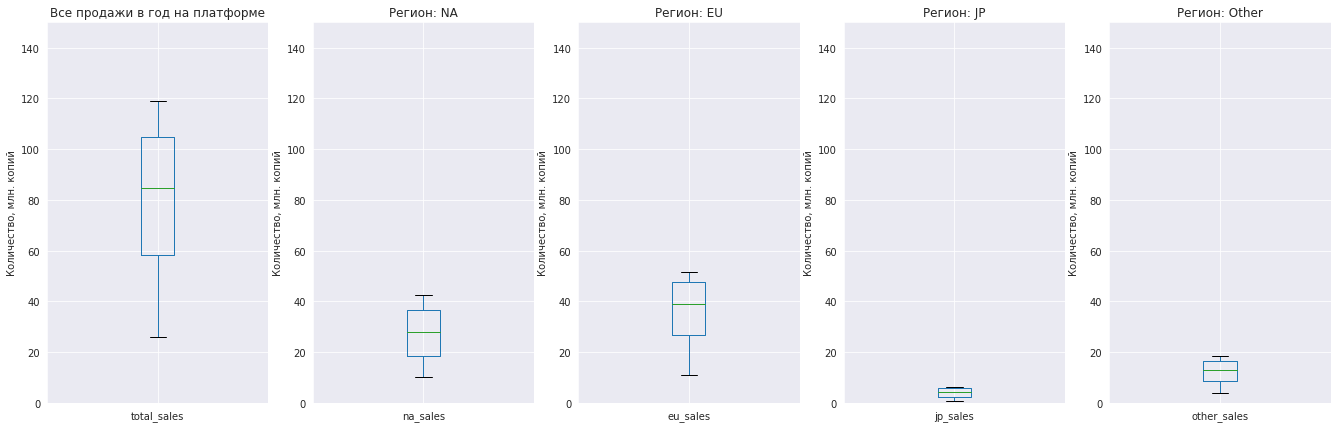

Платформа PS3


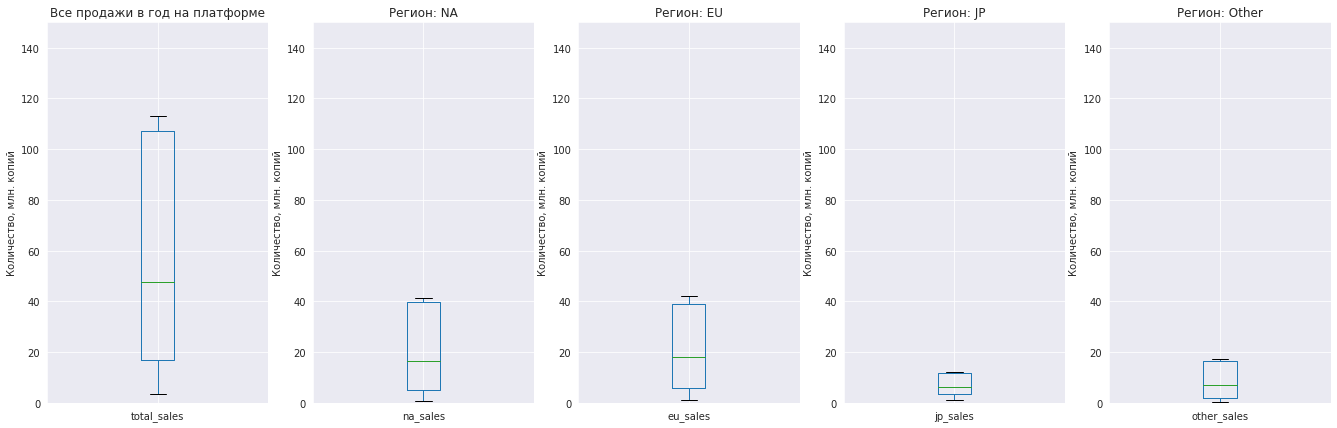

Платформа X360


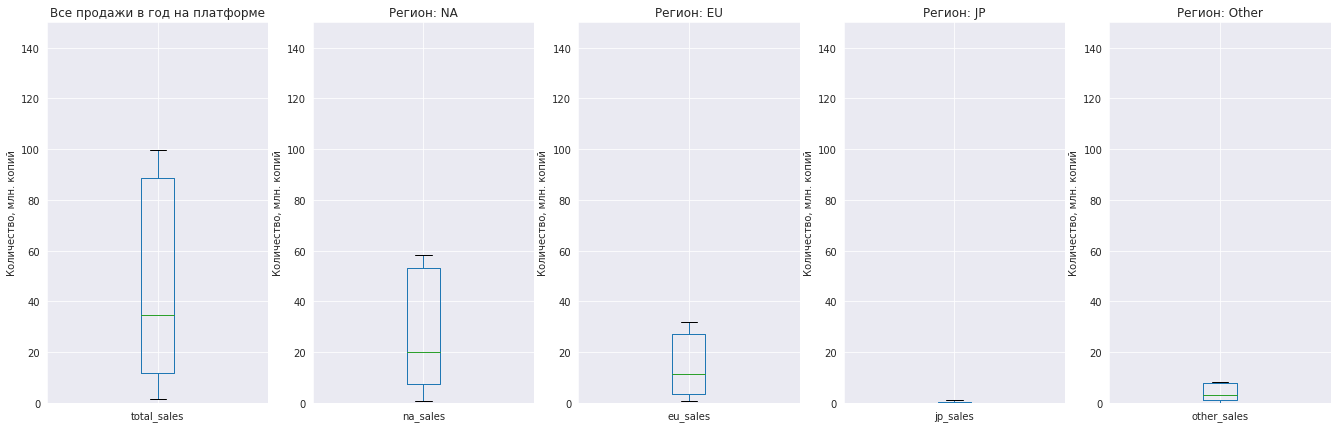

Платформа 3DS


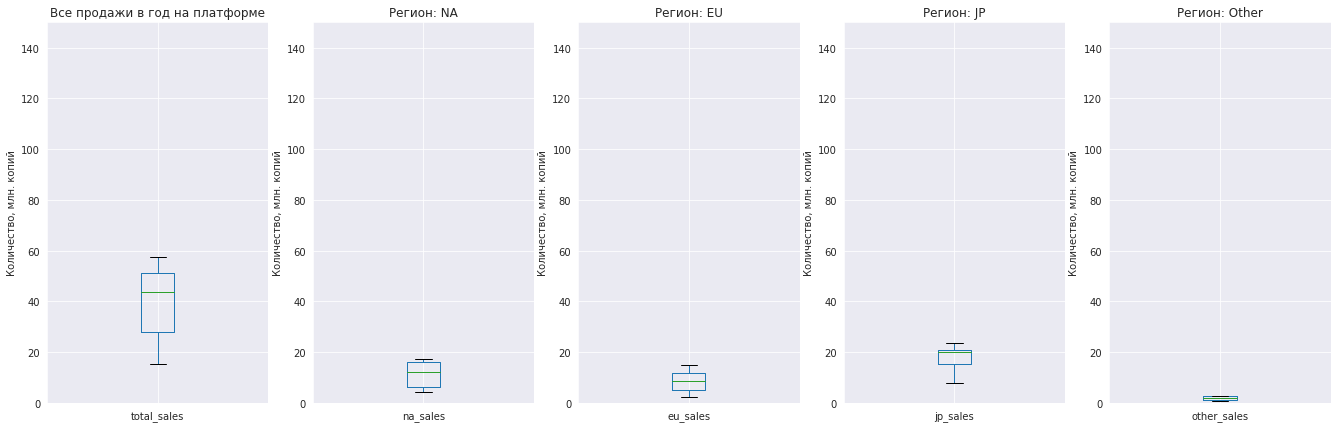

Платформа XOne


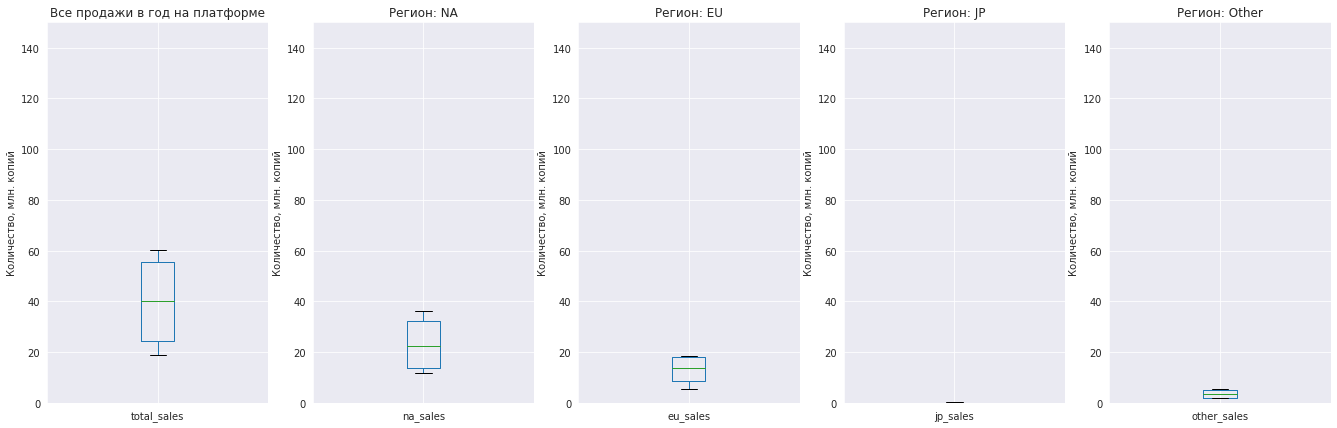

In [26]:
core_platforms = ['PS4', 'PS3', 'X360', '3DS', 'XOne']
for i in core_platforms:
    print('Платформа', i)
    
    plt.figure(figsize=(23, 7))
    
    plt.subplot(1, 5, 1)
    relevant_data[relevant_data['platform'] == i].pivot_table(index = 'year_of_release', values='total_sales', aggfunc='sum').boxplot()
    plt.title('Все продажи в год на платформе')
    plt.ylabel('Количество, млн. копий')
    plt.ylim(0, 150)
    
    plt.subplot(1, 5, 2)
    relevant_data[relevant_data['platform'] == i].pivot_table(index = 'year_of_release', values='na_sales', aggfunc='sum').boxplot()
    plt.title('Регион: NA')
    plt.ylabel('Количество, млн. копий')
    plt.ylim(0, 150)
    
    plt.subplot(1, 5, 3)
    relevant_data[relevant_data['platform'] == i].pivot_table(index = 'year_of_release', values='eu_sales', aggfunc='sum').boxplot()
    plt.title('Регион: EU')
    plt.ylabel('Количество, млн. копий')
    plt.ylim(0, 150)
    
    plt.subplot(1, 5, 4)
    relevant_data[relevant_data['platform'] == i].pivot_table(index = 'year_of_release', values='jp_sales', aggfunc='sum').boxplot()
    plt.title('Регион: JP')
    plt.ylabel('Количество, млн. копий')
    plt.ylim(0, 150)
    
    plt.subplot(1, 5, 5)
    relevant_data[relevant_data['platform'] == i].pivot_table(index = 'year_of_release', values='other_sales', aggfunc='sum').boxplot()
    plt.title('Регион: Other')
    plt.ylabel('Количество, млн. копий')
    plt.ylim(0, 150)
    plt.show()

Анализ глобальных продаж показал, что платформы PS3, PS4 ориентированы по большей части на Европейский, а затем на американский рынок, платформы X360 и XOne на американский рынок, а 3DS на японский рынок. В других регионах предпочитают PS3/PS4. Поскольку PS3/PS4 это два поколения одной и той же платформы, как и X360 и XOne, на графиках можем увидеть что максимальные продажи PS4 превышают максимальные продажи у PS3, в то время как для X360 на пике в течение актуального периода продавалось больше игр, чем для XOne.

#### <a id='section37'>3.7. Влияние отзывов пользователей на продажи внутри платформы</a><br>

Платформа PS4 

Корреляция между отзывами пользователей и общими продажами: -0.031957110204556424 

Корреляция между отзывами пользователей и продажами в NA: -0.020933023099781362 

Корреляция между отзывами пользователей и продажами в EU: -0.048924784620090686 

Корреляция между отзывами пользователей и продажами в JP: 0.17133243836273024 

Корреляция между отзывами пользователей и продажами в Other: -0.03563914215884061 



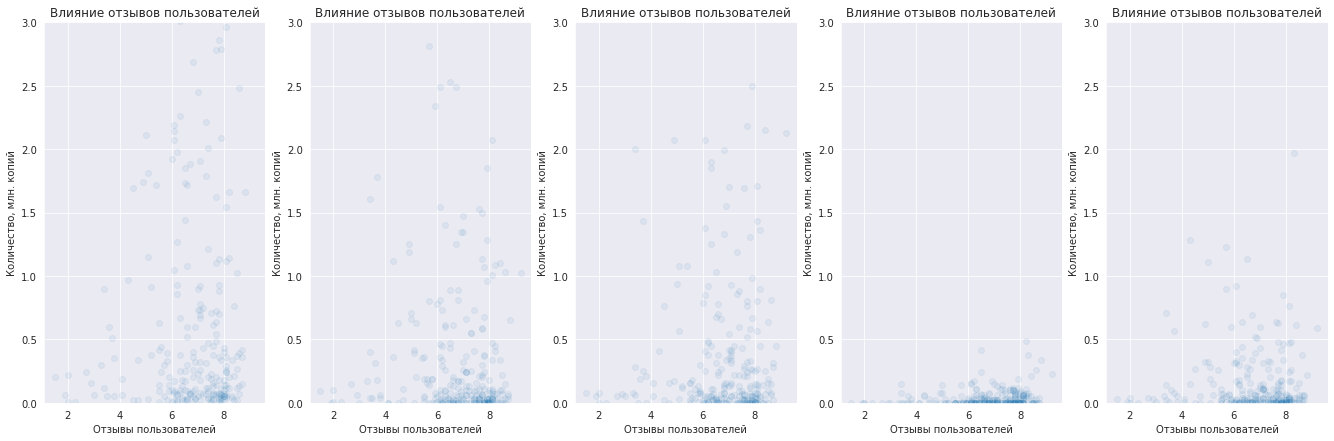

Платформа PS3 

Корреляция между отзывами пользователей и общими продажами: -0.005143522887113815 

Корреляция между отзывами пользователей и продажами в NA: -0.020535877825323172 

Корреляция между отзывами пользователей и продажами в EU: -0.02552152588806154 

Корреляция между отзывами пользователей и продажами в JP: 0.1810288199356308 

Корреляция между отзывами пользователей и продажами в Other: -0.004166291198873541 



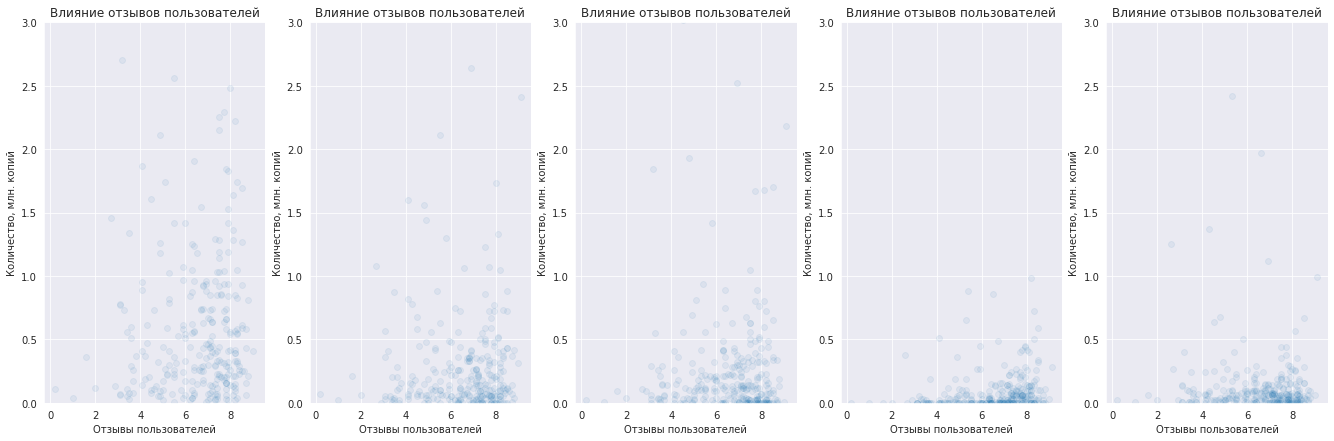

Платформа X360 

Корреляция между отзывами пользователей и общими продажами: 0.006163978646213326 

Корреляция между отзывами пользователей и продажами в NA: -0.0007101954496885562 

Корреляция между отзывами пользователей и продажами в EU: 0.017296647777850366 

Корреляция между отзывами пользователей и продажами в JP: 0.09502291875208164 

Корреляция между отзывами пользователей и продажами в Other: 0.001864585115286946 



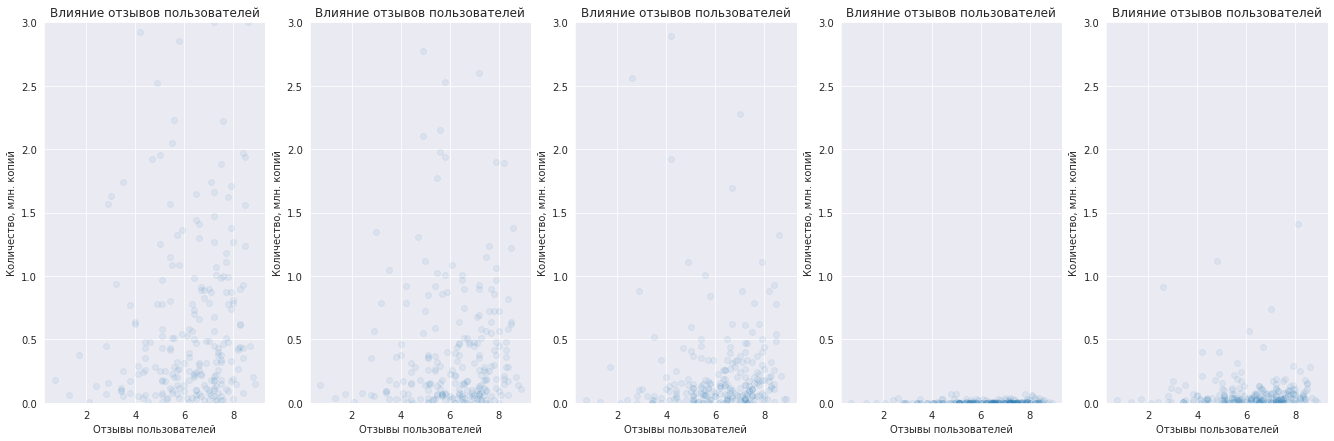

Платформа 3DS 

Корреляция между отзывами пользователей и общими продажами: 0.20373479097542724 

Корреляция между отзывами пользователей и продажами в NA: 0.191018220055889 

Корреляция между отзывами пользователей и продажами в EU: 0.1256587456585094 

Корреляция между отзывами пользователей и продажами в JP: 0.2435416883925618 

Корреляция между отзывами пользователей и продажами в Other: 0.16773976526352455 



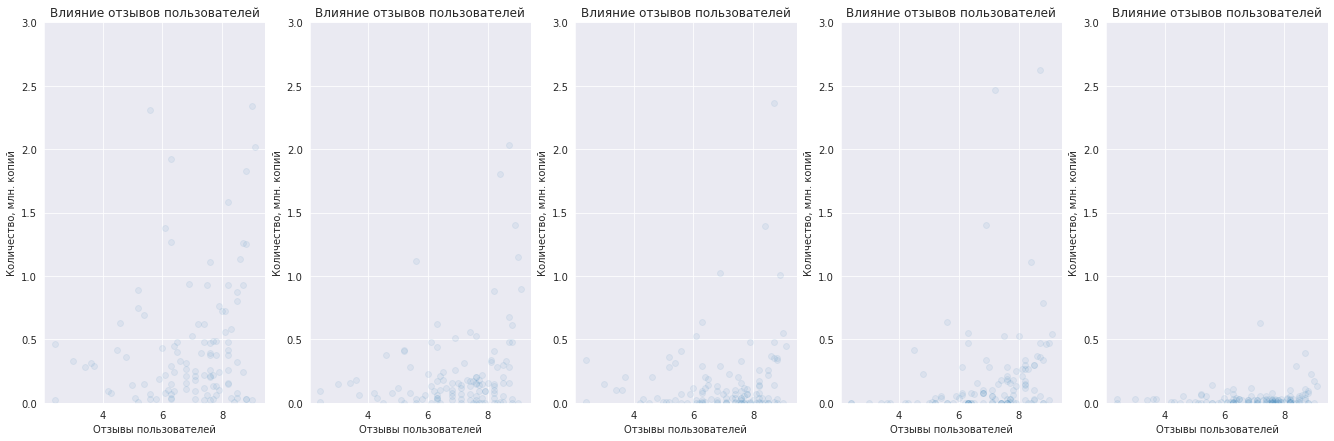

Платформа XOne 

Корреляция между отзывами пользователей и общими продажами: -0.06892505328279414 

Корреляция между отзывами пользователей и продажами в NA: -0.06931782972262666 

Корреляция между отзывами пользователей и продажами в EU: -0.055910907628607676 

Корреляция между отзывами пользователей и продажами в JP: 0.06959068230811864 

Корреляция между отзывами пользователей и продажами в Other: -0.06964512412442934 



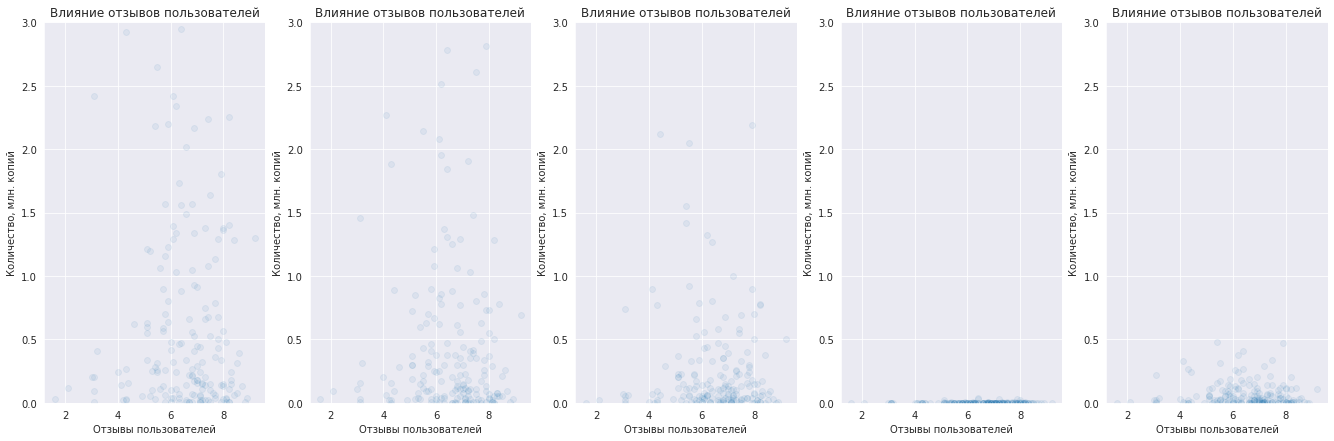

In [27]:
#Исключаем незаполненные значения
user_scores_data = relevant_data[relevant_data['user_score'] > 0]
#Строим графики и считаем корреляцию в цикле
for i in core_platforms:
    print('Платформа', i, '\n')
    
    plt.figure(figsize=(23, 7))
    
    plt.subplot(1, 5, 1)
    plt.scatter(x=user_scores_data[user_scores_data['platform'] == i]['user_score'], y=user_scores_data[user_scores_data['platform'] == i]['total_sales'], alpha=0.07)
    plt.title('Влияние отзывов пользователей')
    plt.ylabel('Количество, млн. копий')
    plt.xlabel('Отзывы пользователей')
    plt.ylim(0, 3)
    print('Корреляция между отзывами пользователей и общими продажами:', user_scores_data[user_scores_data['platform'] == i]['user_score'].corr(user_scores_data[user_scores_data['platform'] == i]['total_sales']), '\n')
    
    plt.subplot(1, 5, 2)
    plt.scatter(x=user_scores_data[user_scores_data['platform'] == i]['user_score'], y=user_scores_data[user_scores_data['platform'] == i]['na_sales'], alpha=0.07)
    plt.title('Влияние отзывов пользователей')
    plt.ylabel('Количество, млн. копий')
    plt.xlabel('Отзывы пользователей')
    plt.ylim(0, 3)
    print('Корреляция между отзывами пользователей и продажами в NA:', user_scores_data[user_scores_data['platform'] == i]['user_score'].corr(user_scores_data[user_scores_data['platform'] == i]['na_sales']), '\n')
    
    plt.subplot(1, 5, 3)
    plt.scatter(x=user_scores_data[user_scores_data['platform'] == i]['user_score'], y=user_scores_data[user_scores_data['platform'] == i]['eu_sales'], alpha=0.07)
    plt.title('Влияние отзывов пользователей')
    plt.ylabel('Количество, млн. копий')
    plt.xlabel('Отзывы пользователей')
    plt.ylim(0, 3)
    print('Корреляция между отзывами пользователей и продажами в EU:', user_scores_data[user_scores_data['platform'] == i]['user_score'].corr(user_scores_data[user_scores_data['platform'] == i]['eu_sales']), '\n')
    
    plt.subplot(1, 5, 4)
    plt.scatter(x=user_scores_data[user_scores_data['platform'] == i]['user_score'], y=user_scores_data[user_scores_data['platform'] == i]['jp_sales'], alpha=0.07)
    plt.title('Влияние отзывов пользователей')
    plt.ylabel('Количество, млн. копий')
    plt.xlabel('Отзывы пользователей')
    plt.ylim(0, 3)
    print('Корреляция между отзывами пользователей и продажами в JP:', user_scores_data[user_scores_data['platform'] == i]['user_score'].corr(user_scores_data[user_scores_data['platform'] == i]['jp_sales']), '\n')
    
    plt.subplot(1, 5, 5)
    plt.scatter(x=user_scores_data[user_scores_data['platform'] == i]['user_score'], y=user_scores_data[user_scores_data['platform'] == i]['other_sales'], alpha=0.07)
    plt.title('Влияние отзывов пользователей')
    plt.ylabel('Количество, млн. копий')
    plt.xlabel('Отзывы пользователей')
    plt.ylim(0, 3)
    print('Корреляция между отзывами пользователей и продажами в Other:', user_scores_data[user_scores_data['platform'] == i]['user_score'].corr(user_scores_data[user_scores_data['platform'] == i]['other_sales']), '\n')
    
    plt.show()

Корреляция между отзывами пользователей и продажами очень слабая или практически отсутствует.

#### <a id='section38'>3.8. Влияние отзывов критиков на продажи внутри платформы</a><br>

Платформа PS4 

Корреляция между отзывами критиков и общими продажами: 0.40656790206178095 

Корреляция между отзывами критиков и продажами в NA: 0.41500763162387244 

Корреляция между отзывами критиков и продажами в EU: 0.3467204675025865 

Корреляция между отзывами критиков и продажами в JP: 0.3223579813084539 

Корреляция между отзывами критиков и продажами в Other: 0.40919130070774706 



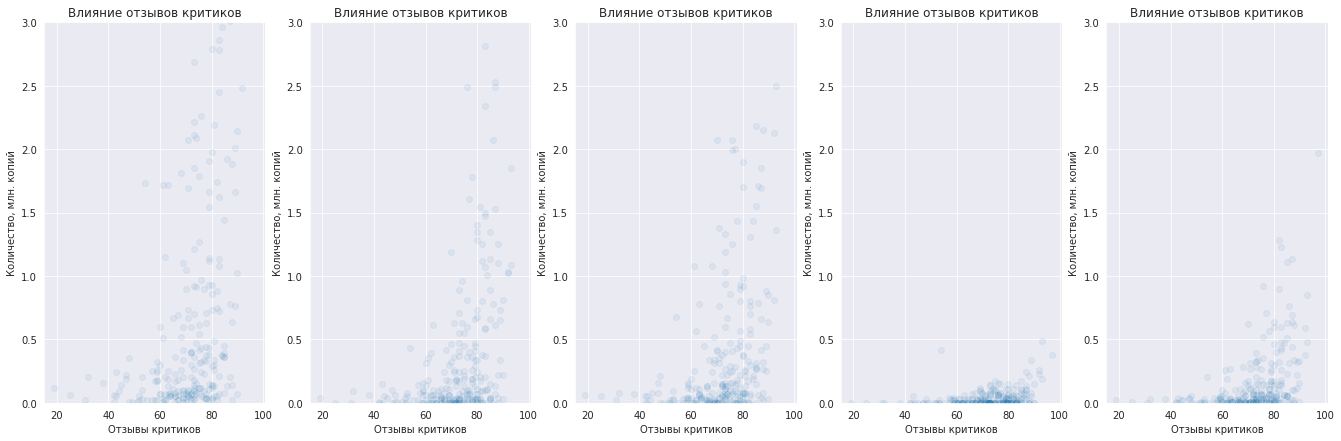

Платформа PS3 

Корреляция между отзывами критиков и общими продажами: 0.3314972592629587 

Корреляция между отзывами критиков и продажами в NA: 0.34021644102504134 

Корреляция между отзывами критиков и продажами в EU: 0.30594345873985346 

Корреляция между отзывами критиков и продажами в JP: 0.173506487907885 

Корреляция между отзывами критиков и продажами в Other: 0.3128556418422845 



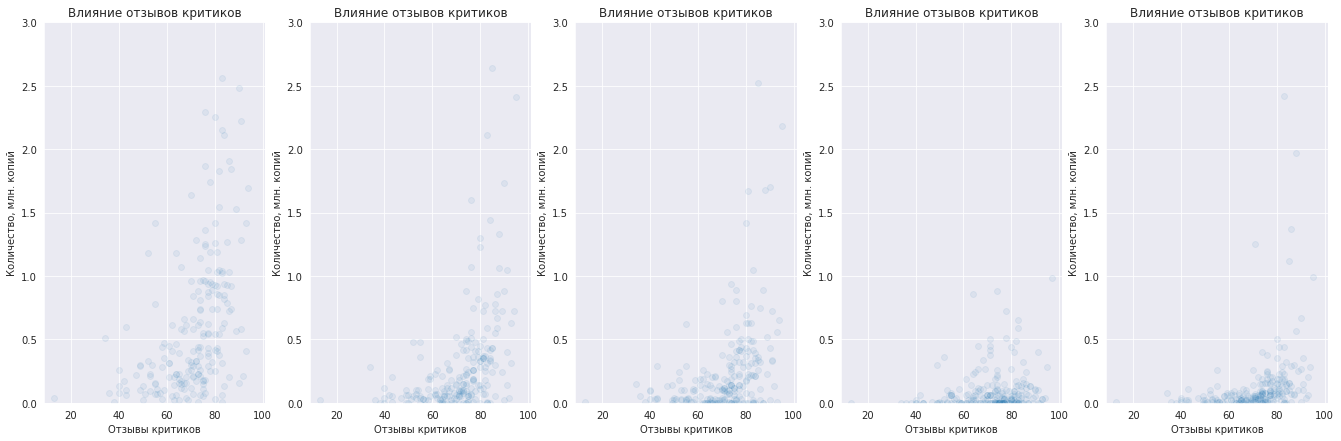

Платформа X360 

Корреляция между отзывами критиков и общими продажами: 0.3605734888507336 

Корреляция между отзывами критиков и продажами в NA: 0.3423413413828575 

Корреляция между отзывами критиков и продажами в EU: 0.35464287685782636 

Корреляция между отзывами критиков и продажами в JP: 0.23309276206768514 

Корреляция между отзывами критиков и продажами в Other: 0.3621179793477988 



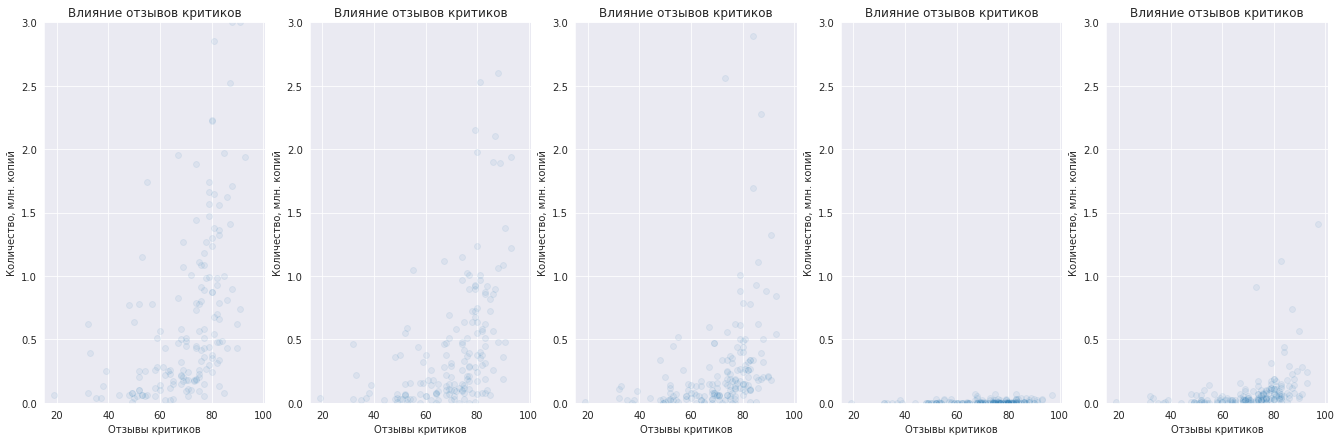

Платформа 3DS 

Корреляция между отзывами критиков и общими продажами: 0.323378043752059 

Корреляция между отзывами критиков и продажами в NA: 0.33154650638552047 

Корреляция между отзывами критиков и продажами в EU: 0.26243201742477773 

Корреляция между отзывами критиков и продажами в JP: 0.30979609846662226 

Корреляция между отзывами критиков и продажами в Other: 0.31107980512837996 



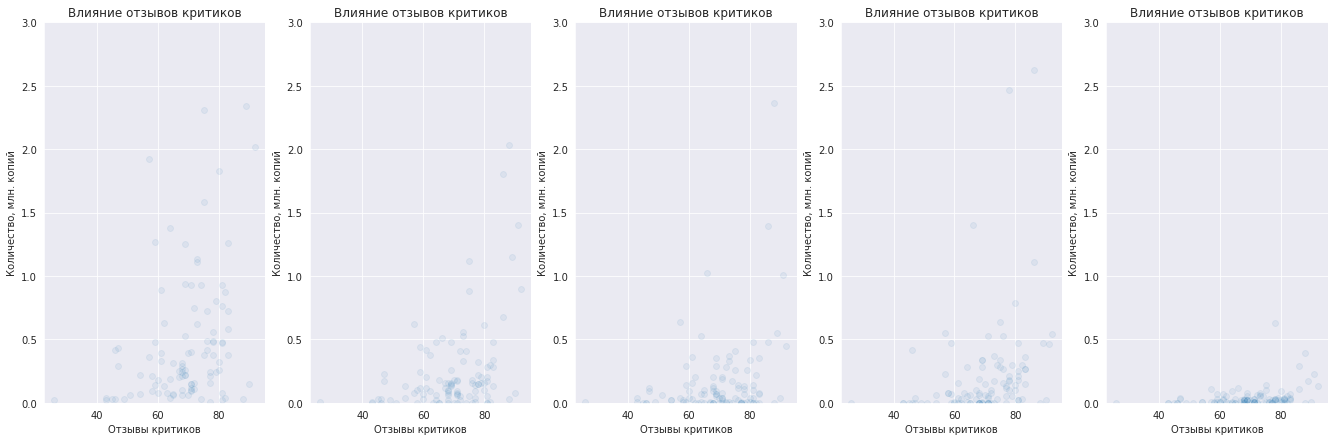

Платформа XOne 

Корреляция между отзывами критиков и общими продажами: 0.4169983280084017 

Корреляция между отзывами критиков и продажами в NA: 0.38863573164950166 

Корреляция между отзывами критиков и продажами в EU: 0.37916195604250347 

Корреляция между отзывами критиков и продажами в JP: 0.20295423956104663 

Корреляция между отзывами критиков и продажами в Other: 0.41182510602138667 



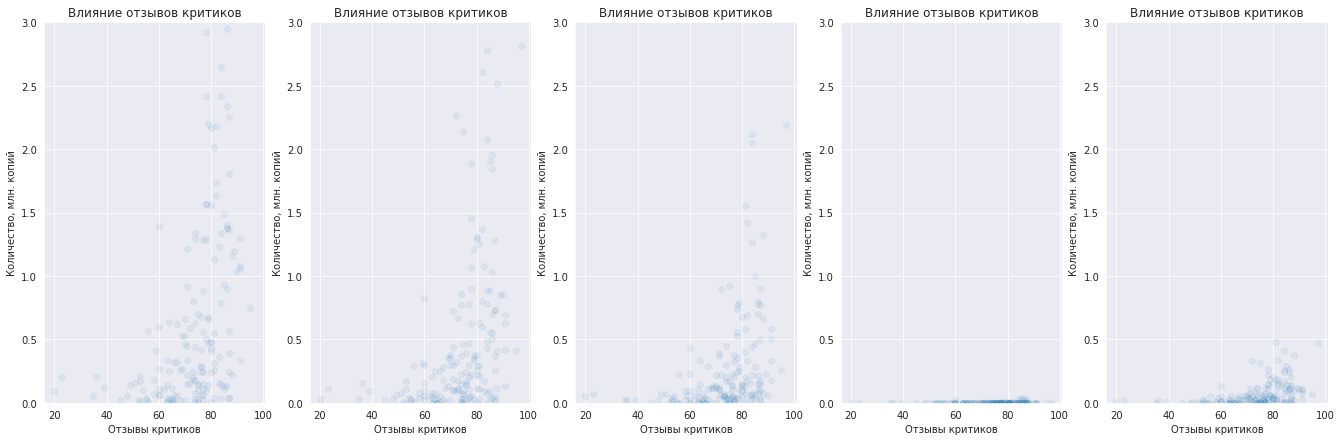

In [28]:
#Исключаем незаполненные значения
critic_scores_data = relevant_data[relevant_data['critic_score'] > 0]
#Строим графики и считаем корреляцию в цикле
for i in core_platforms:
    print('Платформа', i, '\n')
    
    plt.figure(figsize=(23, 7))
    
    plt.subplot(1, 5, 1)
    plt.scatter(x=critic_scores_data[critic_scores_data['platform'] == i]['critic_score'], y=critic_scores_data[critic_scores_data['platform'] == i]['total_sales'], alpha=0.07)
    plt.title('Влияние отзывов критиков')
    plt.ylabel('Количество, млн. копий')
    plt.xlabel('Отзывы критиков')
    plt.ylim(0, 3)
    print('Корреляция между отзывами критиков и общими продажами:', critic_scores_data[critic_scores_data['platform'] == i]['critic_score'].corr(critic_scores_data[critic_scores_data['platform'] == i]['total_sales']), '\n')
    
    plt.subplot(1, 5, 2)
    plt.scatter(x=critic_scores_data[critic_scores_data['platform'] == i]['critic_score'], y=critic_scores_data[critic_scores_data['platform'] == i]['na_sales'], alpha=0.07)
    plt.title('Влияние отзывов критиков')
    plt.ylabel('Количество, млн. копий')
    plt.xlabel('Отзывы критиков')
    plt.ylim(0, 3)
    print('Корреляция между отзывами критиков и продажами в NA:', critic_scores_data[critic_scores_data['platform'] == i]['critic_score'].corr(critic_scores_data[critic_scores_data['platform'] == i]['na_sales']), '\n')
    
    plt.subplot(1, 5, 3)
    plt.scatter(x=critic_scores_data[critic_scores_data['platform'] == i]['critic_score'], y=critic_scores_data[critic_scores_data['platform'] == i]['eu_sales'], alpha=0.07)
    plt.title('Влияние отзывов критиков')
    plt.ylabel('Количество, млн. копий')
    plt.xlabel('Отзывы критиков')
    plt.ylim(0, 3)
    print('Корреляция между отзывами критиков и продажами в EU:', critic_scores_data[critic_scores_data['platform'] == i]['critic_score'].corr(critic_scores_data[critic_scores_data['platform'] == i]['eu_sales']), '\n')
    
    plt.subplot(1, 5, 4)
    plt.scatter(x=critic_scores_data[critic_scores_data['platform'] == i]['critic_score'], y=critic_scores_data[critic_scores_data['platform'] == i]['jp_sales'], alpha=0.07)
    plt.title('Влияние отзывов критиков')
    plt.ylabel('Количество, млн. копий')
    plt.xlabel('Отзывы критиков')
    plt.ylim(0, 3)
    print('Корреляция между отзывами критиков и продажами в JP:', critic_scores_data[critic_scores_data['platform'] == i]['critic_score'].corr(critic_scores_data[critic_scores_data['platform'] == i]['jp_sales']), '\n')
    
    plt.subplot(1, 5, 5)
    plt.scatter(x=critic_scores_data[critic_scores_data['platform'] == i]['critic_score'], y=critic_scores_data[critic_scores_data['platform'] == i]['other_sales'], alpha=0.07)
    plt.title('Влияние отзывов критиков')
    plt.ylabel('Количество, млн. копий')
    plt.xlabel('Отзывы критиков')
    plt.ylim(0, 3)
    print('Корреляция между отзывами критиков и продажами в Other:', critic_scores_data[critic_scores_data['platform'] == i]['critic_score'].corr(critic_scores_data[critic_scores_data['platform'] == i]['other_sales']), '\n')
    
    plt.show()

Корреляция между отзывами критиков и продажами положительная, но она слабая. Отзывы критиков приоритетнее всего для пользователей: 1. других регионов и американского региона, 2. европейского региона 3. японского региона.

#### <a id='section39'>3.9. Определение самых прибыльных и убыточных жанров. </a><br>

In [29]:
#Определяем самые популярные жанры по продажам
games_by_genres = relevant_data.pivot_table(index = 'genre', values='name', aggfunc='count').reset_index().sort_values(by='name', ascending=False)
games_by_genres.columns = ['genre', 'count']
display(games_by_genres.head(15))

,genre,count
0,Action,1032
7,Role-Playing,371
1,Adventure,303
10,Sports,268
8,Shooter,236
3,Misc,192
6,Racing,116
2,Fighting,109
4,Platform,85
9,Simulation,81


Самые популярные жанры по количеству игр - Action, Role-Playing, Adventure, Sports. Самые непопулярные жанры Puzzle, Strategy, Simulation, Platform.

In [30]:
#Определяем самые прибыльные жанры по продажам
total_sales_by_genres = relevant_data.pivot_table(index = 'genre', values='total_sales', aggfunc='sum').reset_index().sort_values(by='total_sales', ascending=False)
display(total_sales_by_genres.head(15))

,genre,total_sales
0,Action,441.52
8,Shooter,304.80
7,Role-Playing,193.06
10,Sports,181.07
3,Misc,85.04
4,Platform,61.00
6,Racing,53.59
2,Fighting,44.49
9,Simulation,35.31
1,Adventure,29.52


Больше всего прибыли принесли жанры - Action, Shooter, Role-Playing, Sports. Жанры с минимальными продажами - Puzzle, Strategy, Adventure, Simulation. Изучим их подробнее.

In [31]:
#Рассчитаем, сколько в среднем приносят игры разных жанров
genres = total_sales_by_genres.merge(games_by_genres, on='genre', how='outer')
genres['mean_sales_by_genres'] = genres['total_sales'] / genres['count']
display(genres.sort_values(by='mean_sales_by_genres', ascending=False).head(12))

,genre,total_sales,count,mean_sales_by_genres
1,Shooter,304.80,236,1.291525
5,Platform,61.00,85,0.717647
3,Sports,181.07,268,0.675634
2,Role-Playing,193.06,371,0.520377
6,Racing,53.59,116,0.461983
4,Misc,85.04,192,0.442917
8,Simulation,35.31,81,0.435926
0,Action,441.52,1032,0.427829
7,Fighting,44.49,109,0.408165
10,Strategy,13.34,71,0.187887


Самые прибыльные жанрыСамые прибыльные жанры в расчете "средняя прибыль на игру": Shooter, Platform, Sports, Role-Playing. Самые неприбыльные жанры: Strategy, Puzzle, Adventure. Жанр Platform исключим из перечня из-за небольшого количества выпущенных игр. Построим графики, чтобы понять различия прибыльных и неприбыльных жанров по регионам.

Жанр Shooter


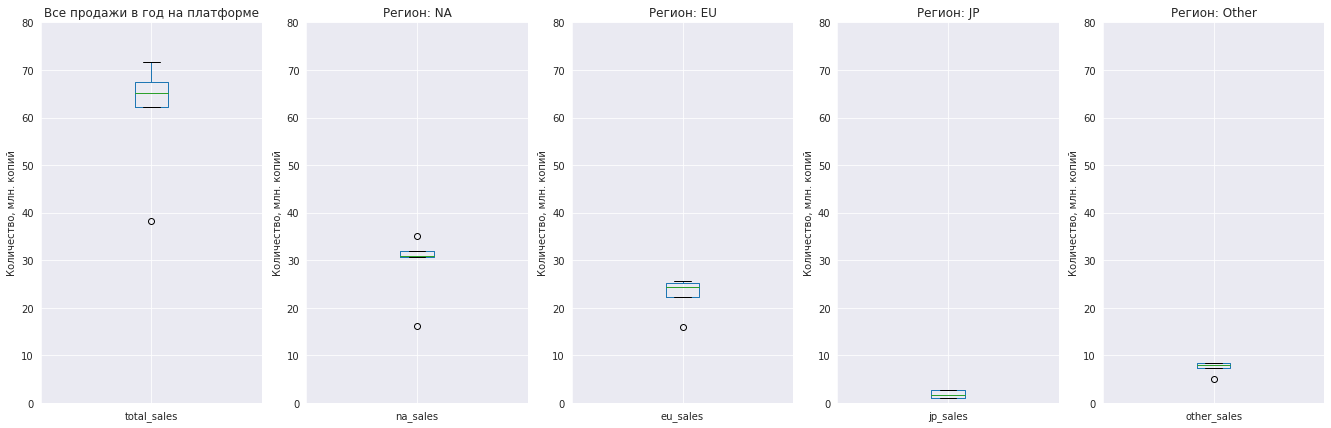

Жанр Sports


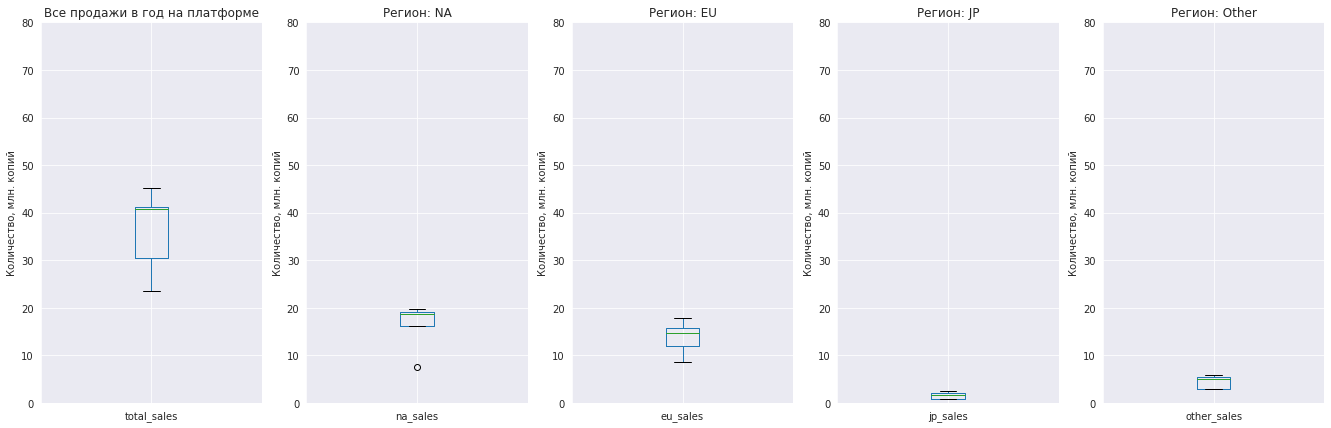

Жанр Role-Playing


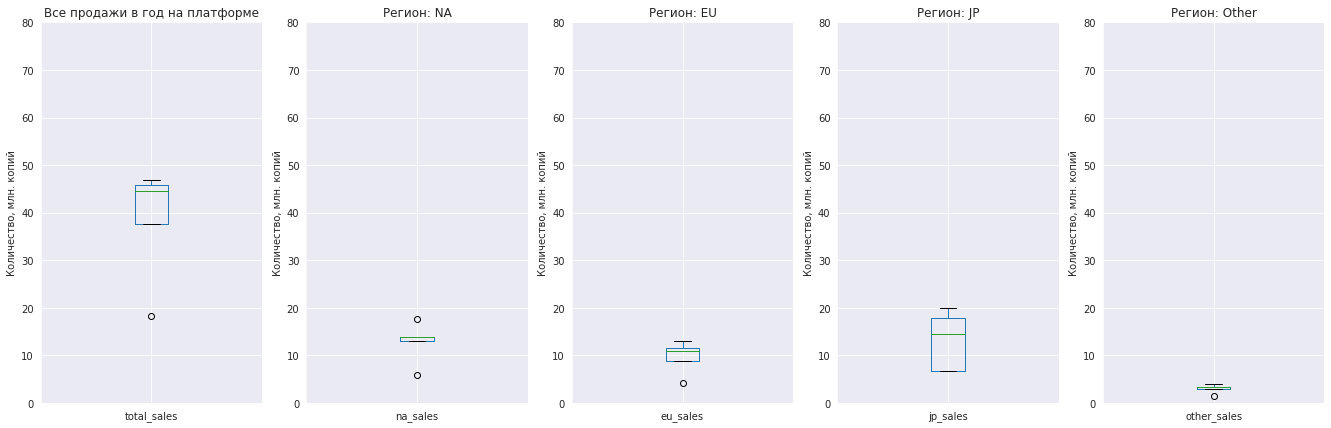

In [32]:
top_genres = ['Shooter', 'Sports', 'Role-Playing']
for i in top_genres:
    print('Жанр', i)
    
    plt.figure(figsize=(23, 7))
    
    plt.subplot(1, 5, 1)
    relevant_data[relevant_data['genre'] == i].pivot_table(index = 'year_of_release', values='total_sales', aggfunc='sum').boxplot()
    plt.title('Все продажи в год на платформе')
    plt.ylabel('Количество, млн. копий')
    plt.ylim(0, 80)
    
    plt.subplot(1, 5, 2)
    relevant_data[relevant_data['genre'] == i].pivot_table(index = 'year_of_release', values='na_sales', aggfunc='sum').boxplot()
    plt.title('Регион: NA')
    plt.ylabel('Количество, млн. копий')
    plt.ylim(0, 80)
    
    plt.subplot(1, 5, 3)
    relevant_data[relevant_data['genre'] == i].pivot_table(index = 'year_of_release', values='eu_sales', aggfunc='sum').boxplot()
    plt.title('Регион: EU')
    plt.ylabel('Количество, млн. копий')
    plt.ylim(0, 80)
    
    plt.subplot(1, 5, 4)
    relevant_data[relevant_data['genre'] == i].pivot_table(index = 'year_of_release', values='jp_sales', aggfunc='sum').boxplot()
    plt.title('Регион: JP')
    plt.ylabel('Количество, млн. копий')
    plt.ylim(0, 80)
    
    plt.subplot(1, 5, 5)
    relevant_data[relevant_data['genre'] == i].pivot_table(index = 'year_of_release', values='other_sales', aggfunc='sum').boxplot()
    plt.title('Регион: Other')
    plt.ylabel('Количество, млн. копий')
    plt.ylim(0, 80)
    plt.show()

Жанры Shooter и Sports популярны в Америке, Европе, других регионах и непопулярен в Японии. Жанр Role-Playing популярен в Америке, Японии и в меньшей степени в Европе и других регионах.

Жанр Strategy


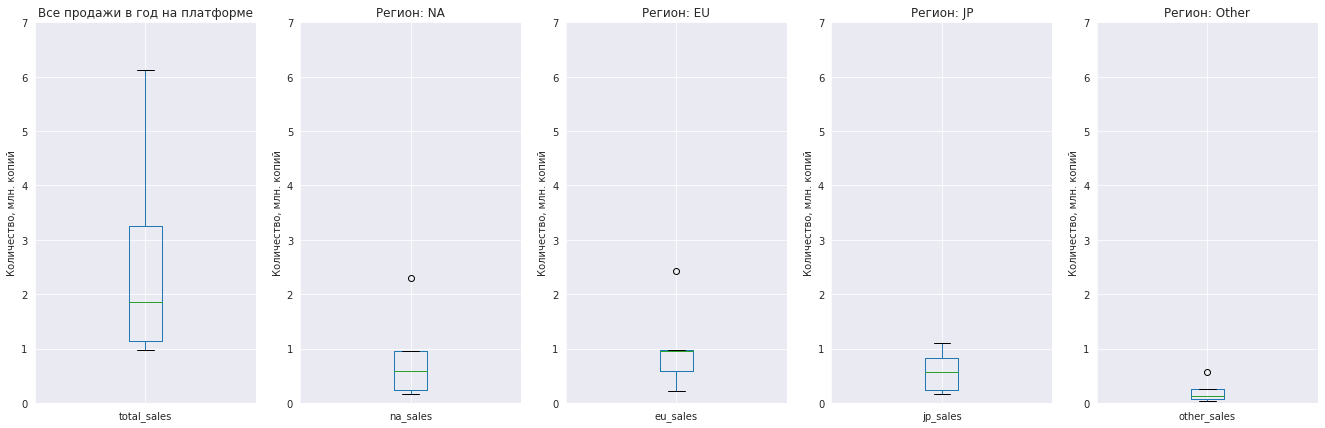

Жанр Puzzle


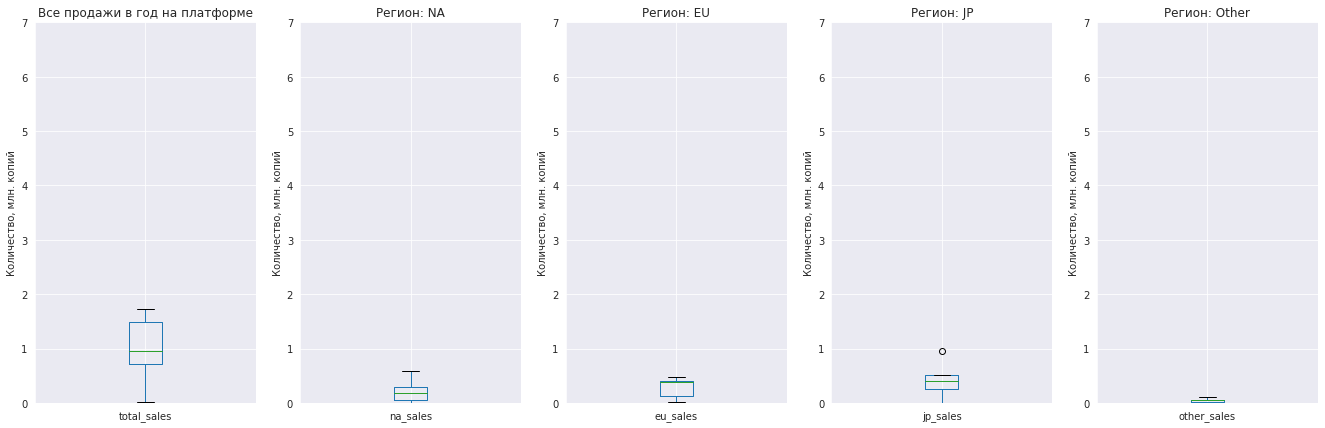

Жанр Adventure


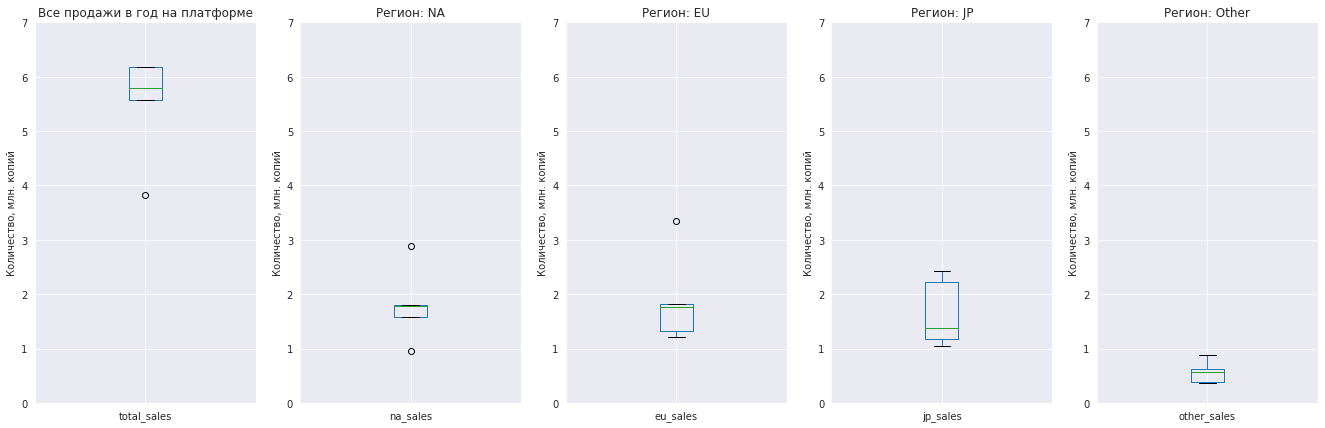

In [33]:
bottom_genres = ['Strategy', 'Puzzle', 'Adventure']
for i in bottom_genres:
    print('Жанр', i)
    
    plt.figure(figsize=(23, 7))
    
    plt.subplot(1, 5, 1)
    relevant_data[relevant_data['genre'] == i].pivot_table(index = 'year_of_release', values='total_sales', aggfunc='sum').boxplot()
    plt.title('Все продажи в год на платформе')
    plt.ylabel('Количество, млн. копий')
    plt.ylim(0, 7)
    
    plt.subplot(1, 5, 2)
    relevant_data[relevant_data['genre'] == i].pivot_table(index = 'year_of_release', values='na_sales', aggfunc='sum').boxplot()
    plt.title('Регион: NA')
    plt.ylabel('Количество, млн. копий')
    plt.ylim(0, 7)
    
    plt.subplot(1, 5, 3)
    relevant_data[relevant_data['genre'] == i].pivot_table(index = 'year_of_release', values='eu_sales', aggfunc='sum').boxplot()
    plt.title('Регион: EU')
    plt.ylabel('Количество, млн. копий')
    plt.ylim(0, 7)
    
    plt.subplot(1, 5, 4)
    relevant_data[relevant_data['genre'] == i].pivot_table(index = 'year_of_release', values='jp_sales', aggfunc='sum').boxplot()
    plt.title('Регион: JP')
    plt.ylabel('Количество, млн. копий')
    plt.ylim(0, 7)
    
    plt.subplot(1, 5, 5)
    relevant_data[relevant_data['genre'] == i].pivot_table(index = 'year_of_release', values='other_sales', aggfunc='sum').boxplot()
    plt.title('Регион: Other')
    plt.ylabel('Количество, млн. копий')
    plt.ylim(0, 7)
    plt.show()


Жанр Strategy и Puzzle популярны в Европе, Японии и в меньшей степени в Америке и других регионах. Жанр Adventure популярен в Америке, Европе, Японии и меньше в других регионах. 

### Вывод

Больше всего игр было выпущено в период 2008-2009 гг. Последующее падение продаж можно объяснить развитием рынка игр для мобильных устройств. Многие игроки предпочли бюджетные, переносные мобильные устройства старым платформам. Наиболее актуальный период для прогнозирования продаж на 2017 год - это данные с 2012 года. В среднем для самых популярных платформ основное количество игр выпускается в течение 5-9 лет. Наибольшие продажи у PS4, PS3, X360, 3DS, XOne. Определим, какие из всех платформ растут в продажах, а какие падают. Все популярные платформы имеют убывающие показатели продаж. Поскольку платформы X360 и PS3 вышли на стыке 2006-2007 гг., а 3DS в 2011 г. данные по ним менее актуальны для прогнозирования чем на современных платформах PS4 и XOne (старт продаж для последних в 2013 г.). В дальнейшем будем работать с этими 5 платформами. Анализ глобальных продаж показал, что платформы PS3, PS4 ориентированы по большей части на европейский, а затем на американский рынок, платформы X360 и XOne на американский рынок, а 3DS на японский рынок. В других регионах предпочитают PS3/PS4. Поскольку PS3/PS4 это два поколения одной и той же платформы, как и X360 и XOne, на графиках можем увидеть что максимальные продажи PS4 превышают максимальные продажи у PS3, в то время как для X360 на пике в течение актуального периода продавалось больше игр, чем для XOne. Корреляция между отзывами пользователей и продажами очень слабая или практически отсутствует. Корреляция между отзывами критиков и продажами положительная, но она слабая. Отзывы критиков приоритетнее всего для пользователей: 1. других регионов и американского региона, 2. европейского региона 3. японского региона. Самые прибыльные популярные жанры в расчете "средняя прибыль на игру": Shooter, Sports, Role-Playing. Самые неприбыльные жанры: Strategy, Puzzle, Adventure.  Жанры Shooter и Sports популярны в Америке, Европе, других регионах и непопулярен в Японии. Жанр Role-Playing популярен в Америке, Японии и в меньшей степени в Европе и других регионах. Жанр Strategy и Puzzle популярны в Европе, Японии и в меньшей степени в Америке и других регионах. Жанр Adventure популярен в Америке, Европе, Японии и меньше в других регионах. 

### <a id='section4'>4. Составление портрета пользователя каждого региона (NA, EU, JP)</a><br>

#### <a id='section41'>4.1. Определение топ-5 популярных платформ</a><br>

Регион: na_sales


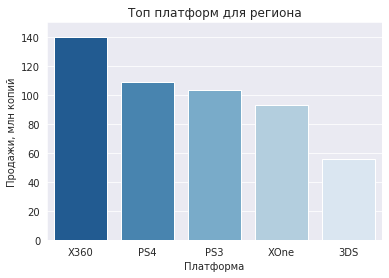

Регион: eu_sales


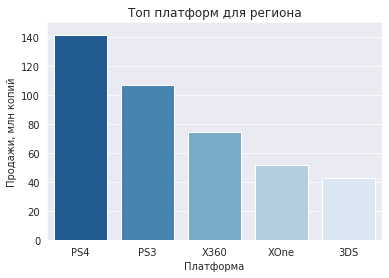

Регион: jp_sales


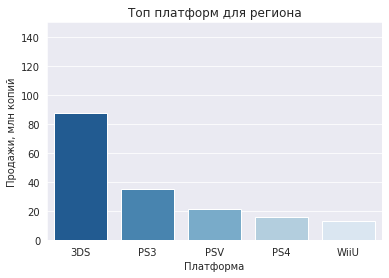

In [34]:
#создаем лист с интересующими нас регионами и определяем топ платформы в цилке
regions = ['na_sales', 'eu_sales', 'jp_sales']
for i in regions:
    platform_by_regions = relevant_data.groupby(['platform']).agg('sum').reset_index().sort_values(by=i, ascending=False)[['platform', i]].head(5)
    print('Регион:', i)
    ax = sns.barplot(x = 'platform', y = i, data = platform_by_regions, palette="Blues_r")
    ax.set_title('Топ платформ для региона')
    ax.set_xlabel('Платформа')
    ax.set_ylabel('Продажи, млн копий')
    ax.set_ylim(0, 150)
    plt.show()

В Америке суммарные продажи X360/XOne превышают продажи PS3/PS4. Приставки 3DS замыкают пятерку лидеров. В Европе ситуация противоположная - суммарные продажи PS3/PS4 превышают продажи X360/XOne, 3DS также на пятом месте. В Японии на первом месте приставки Nintendo 3DS, затем идут платформы PS3/PS4/PS5, и замыкают рейтинг приставки WiiU от Nintendo.

#### <a id='section42'>4.2. Определение топ-5 популярных жанров</a><br>

Регион: na_sales


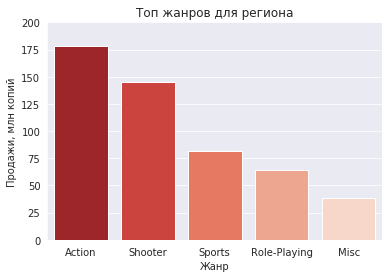

Регион: eu_sales


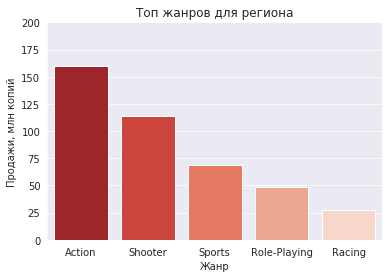

Регион: jp_sales


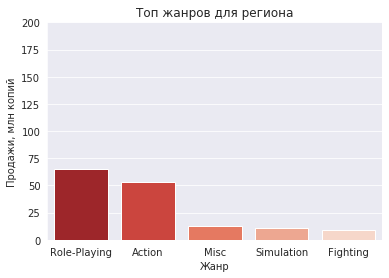

In [35]:
regions = ['na_sales', 'eu_sales', 'jp_sales']
for i in regions:
    genres_by_regions = relevant_data.groupby(['genre']).agg('sum').reset_index().sort_values(by=i, ascending=False)[['genre', i]].head(5)
    print('Регион:', i)
    ax = sns.barplot(x = 'genre', y = i, data = genres_by_regions, palette="Reds_r")
    ax.set_title('Топ жанров для региона')
    ax.set_xlabel('Жанр')
    ax.set_ylabel('Продажи, млн копий')
    ax.set_ylim(0, 200)
    plt.show()

В Америке и Европе топ-4 жанров по продажам - это Action, Shooter, Sports, Role-Playing. На 5м месте в Европе Racing, а в Америке Misc. В Японии самые популярные жанры - Role-Playing, Action, далее с большим отрывом идут Misc, Simulation, Fighting.

#### <a id='section43'>4.3. Влияние рейтинга ESRB на продажи в отдельном регионе</a><br>

Регион: na_sales


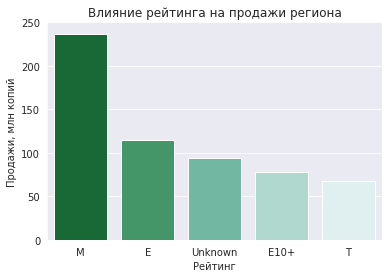

Регион: eu_sales


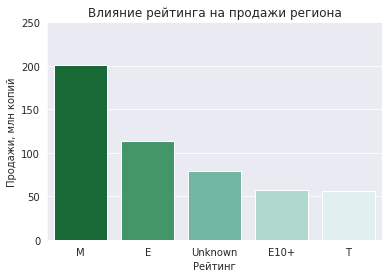

Регион: jp_sales


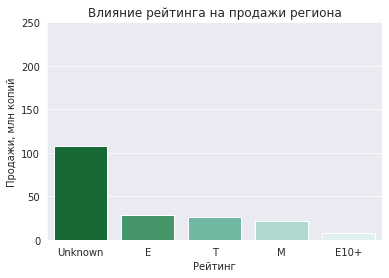

In [36]:
#Строим диаграммы рассеяния для каждого региона через цикл и считаем корреляцию
group_by_rating = relevant_data.groupby('rating').agg('sum').reset_index()
for i in regions:
    print('Регион:', i)
    ax = sns.barplot(data=group_by_rating[['rating', i]].sort_values(by=i, ascending=False), x='rating', y=i, palette='BuGn_r')
    ax.set_title('Влияние рейтинга на продажи региона')
    ax.set_xlabel('Рейтинг')
    ax.set_ylabel('Продажи, млн копий')
    ax.set_ylim(0, 250)
    plt.show()

В Америке и Европе лидируют игры с рейтингом "Для взрослых", затем "Для всех", на третьем месте "Неизвестен", затем "Для всех старше десяти", на пятом месте "Подросткам". В Японии ситуация иная: На первом месте "Неизвестен", потом "Для всех", затем "Для подростков", на четвертом месте "Для взрослых", на пятом "Для всех старше десяти".

### Вывод

В Америке предпочитают платформы X360/XOne, а в Европе PS3/PS4. В Японии на первом месте приставки Nintendo 3DS, затем идут платформы PS3/PS4/PS5. По жанрам В Америке и Европе похожие предподчения. Топ-4 жанров в этих регионах по продажам - это Action, Shooter, Sports, Role-Playing. На 5м месте в Европе Racing, а в Америке Misc, что говорит о популярности такого спорта как Racing в Европе. В Японии самые популярные жанры - Role-Playing, Action, далее с большим отрывом идут Misc, Simulationm Fighting. Геймеры в Японии больше предпочитают одиночные игры, чем в Америке и Европе. В Америке и Европе лидируют игры с рейтингом "Для взрослых", затем "Для всех", на третьем месте "Неизвестен", затем "Для всех старше десяти", на пятом месте "Подросткам". В Японии ситуация иная: На первом месте "Неизвестен", потом "Для всех", затем "Для подростков", на четвертом месте "Для взрослых", на пятом "Для всех старше десяти". Это говорит о более возрастной аудитории в Америке и Европе и более молодой аудитории геймеров в Японии. Рейтинг 'Unknown' нуждается в более подробном изучении, особенно в японском регионе.

### <a id='section5'>5. Проверка гипотез</a><br>
#### <a id='section51'>5.1. Нулевая гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC равны</a><br>

#### Альтернативная гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC не равны

In [37]:
#Проверяем равенство дисперсий выборок. Пороговое значение задаем 0.05. Исключаем нулевые значения user_score
alpha = 0.05
variance_equality1 = st.levene(
    relevant_data.query('platform == "XOne" & user_score > 0')['user_score'],
    relevant_data.query('platform == "PC" & user_score > 0')['user_score'])
if variance_equality1.pvalue < alpha:
    print('\t', 'Отвергаем равенство дисперсий выборок')
else:
    print('\t', 'Отвергаем равенство дисперсий выборок')

	 Отвергаем равенство дисперсий выборок


In [38]:
#Проводим тест с учетом того, что дисперсии не равны (параметр equal_var). Пороговое значение задаем 0.05.  Исключаем нулевые значения user_score
alpha = 0.05
results1 = st.ttest_ind(
    relevant_data.query('platform == "XOne" & user_score > 0')['user_score'],
    relevant_data.query('platform == "PC" & user_score > 0')['user_score'],
    equal_var=False)
print('\t', 'p-значение: ', results1.pvalue)
if results1.pvalue < alpha:
    print('\t', 'Отвергаем нулевую гипотезу')
else:
    print('\t', 'Не получилось отвергнуть нулевую гипотезу')

	 p-значение:  0.5489537965134912
	 Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу 1: Средние пользовательские рейтинги платформ Xbox One и PC равны.

#### <a id='section52'>5.2. Нулевая гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports равны</a><br>

#### Альтернативная гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports не равны

In [39]:
#Проверяем равенство дисперсий выборок. Пороговое значение задаем 0.05. Исключаем нулевые значения user_score
alpha = 0.05
variance_equality2 = st.levene(
    relevant_data.query('genre == "Action" & user_score > 0')['user_score'],
    relevant_data.query('genre == "Sports" & user_score > 0')['user_score'])
if variance_equality2.pvalue < alpha:
    print('\t', 'Отвергаем равенство дисперсий выборок')
else:
    print('\t', 'Отвергаем равенство дисперсий выборок')

	 Отвергаем равенство дисперсий выборок


In [40]:
#Проводим тест с учетом того, что дисперсии не равны (параметр equal_var). Пороговое значение задаем 0.05. Исключаем нулевые значения user_score
alpha = 0.05
results2 = st.ttest_ind(
    relevant_data.query('genre == "Action" & user_score > 0')['user_score'],
    relevant_data.query('genre == "Sports" & user_score > 0')['user_score'],
    equal_var=False)
print('\t', 'p-значение: ', results2.pvalue)
if results2.pvalue < alpha:
    print('\t', 'Отвергаем нулевую гипотезу')
else:
    print('\t', 'Не получилось отвергнуть нулевую гипотезу')

	 p-значение:  4.305337670692197e-20
	 Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу "Средние пользовательские рейтинги жанров Action и Sports равны". Выдвигаем альтернативную гипотезу "Средние пользовательские рейтинги жанров Action и Sports не равны".

### Вывод

Средние пользовательские рейтинги платформ Xbox One и PC равны, а средние пользовательские рейтинги жанров Action и Sports не равны.

### <a id='section6'>Общий вывод</a>

Изначально в таблице с данными 16715 наблюдений. Часть пропусков было исключено, часть заменено на значения похожих игр('Critic_Score', 'User_Score'), пропуски 'Year of Release' игры заменены на средний год выпуска для платформы. Данные проверены на дубликаты и приведены к соответсвующим типам. Больше всего игр было выпущено в период 2008-2009 гг. Последующее падение продаж можно объяснить развитием рынка игр для мобильных устройств. Многие игроки предпочли бюджетные, переносные мобильные устройства старым платформам. Наиболее актуальный период для прогнозирования продаж на 2017 год - это данные с 2012 года. В среднем для самых популярных платформ основное количество игр выпускается в течение 5-9 лет. Наибольшие продажи у PS4, PS3, X360, 3DS, XOne. Все популярные платформы имеют убывающие показатели продаж. Поскольку платформы X360 и PS3 вышли на стыке 2006-2007 гг., а 3DS в 2011 г. данные по ним менее актуальны для прогнозирования чем на современных платформах PS4 и XOne (старт продаж для последних в 2013 г.). Анализ глобальных продаж показал, что платформы PS3, PS4 ориентированы по большей части на европейский, а затем на американский рынок, платформы X360 и XOne на американский рынок, а 3DS на японский рынок. В других регионах предпочитают PS3/PS4. Корреляция между отзывами пользователей и продажами очень слабая или практически отсутствует. Корреляция между отзывами критиков и продажами положительная, но она слабая. Отзывы критиков приоритетнее всего для пользователей: 1. других регионов и американского региона, 2. европейского региона 3. японского региона. Самые прибыльные популярные жанры в расчете "средняя прибыль на игру": Shooter, Sports, Role-Playing. Самые неприбыльные жанры: Strategy, Puzzle, Adventure.  Жанры Shooter и Sports популярны в Америке, Европе, других регионах и непопулярен в Японии. Жанр Role-Playing популярен в Америке, Японии и в меньшей степени в Европе и других регионах. По жанрам В Америке и Европе похожие предподчения. Топ-4 жанров в этих регионах по продажам - это Action, Shooter, Sports, Role-Playing. На 5м месте в Европе Racing, а в Америке Misc, что говорит о популярности такого спорта как Racing в Европе. В Японии самые популярные жанры - Role-Playing, Action, далее с большим отрывом идут Misc, Simulationm Fighting. Геймеры в Японии больше предпочитают одиночные игры, чем в Америке и Европе. В Америке и Европе лидируют игры с рейтингом "Для взрослых", затем "Для всех", на третьем месте "Неизвестен", затем "Для всех старше десяти", на пятом месте "Подросткам". В Японии ситуация иная: На первом месте "Неизвестен", потом "Для всех", затем "Для подростков", на четвертом месте "Для взрослых", на пятом "Для всех старше десяти". Это говорит о более возрастной аудитории в Америке и Европе и более молодой аудитории геймеров в Японии. Рейтинг 'Unknown' нуждается в более подробном изучении, особенно в японском регионе. Средние пользовательские рейтинги платформ Xbox One и PC равны, а средние пользовательские рейтинги жанров Action и Sports не равны.